import library

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [26]:
#Read the Data
calories=pd.read_csv('calories.csv')
exercise=pd.read_csv('exercise.csv')

In [27]:
#Marge the to Files
data = pd.merge(calories, exercise, on='User_ID', how='inner')
data

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [28]:
#is there is null in data
data.isna().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [29]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [30]:
# Describe Data
data.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


<Axes: >

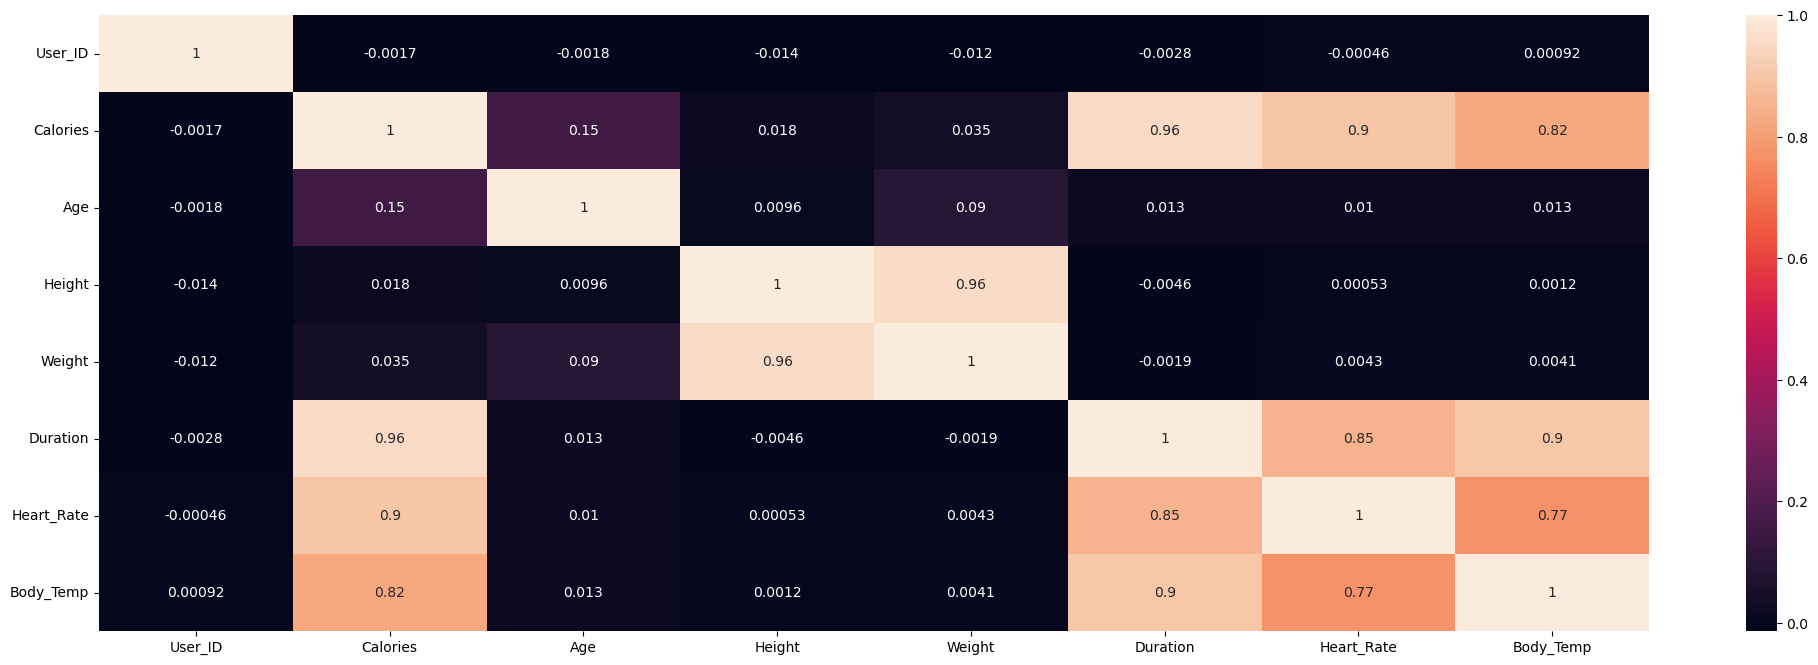

In [31]:
# correlation matrix
plt.figure(figsize=(25,8))
sns.heatmap(data.select_dtypes(exclude='object').corr(),annot=True)

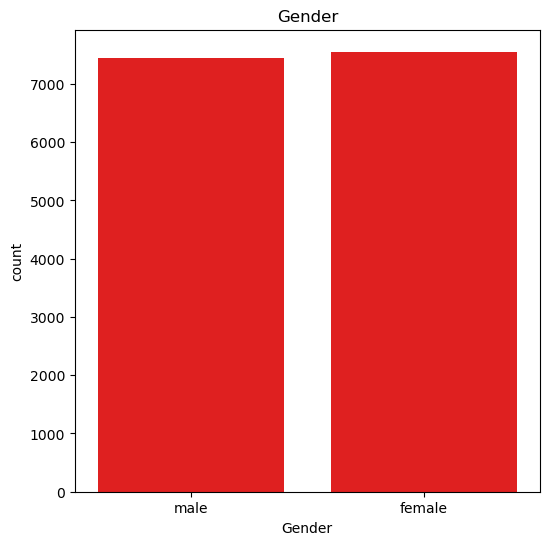

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender', data=data, color='red')
plt.title('Gender')
plt.show()

/var/folders/l0/4vlfv_h14psdkdgqhr2v8sqw0000gn/T/ipykernel_19068/3286700034.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'])


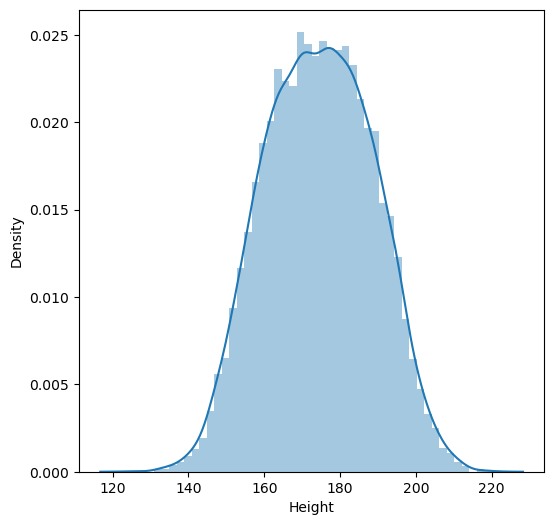

In [33]:
plt.figure(figsize=(6,6))
sns.distplot(data['Height'])
plt.show()

/var/folders/l0/4vlfv_h14psdkdgqhr2v8sqw0000gn/T/ipykernel_19068/407279357.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


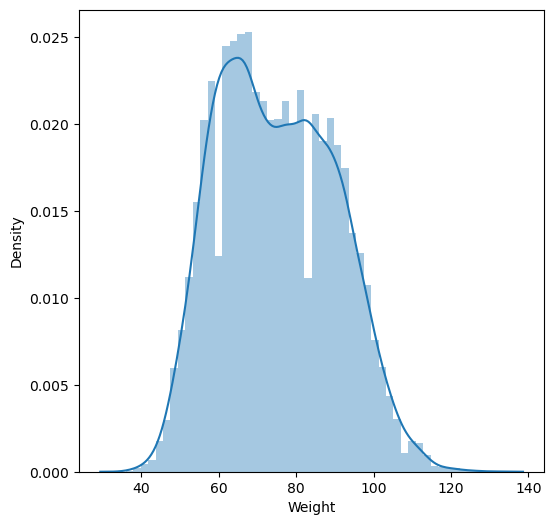

In [34]:
plt.figure(figsize=(6,6))
sns.distplot(data['Weight'])
plt.show()

/var/folders/l0/4vlfv_h14psdkdgqhr2v8sqw0000gn/T/ipykernel_19068/4017870548.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


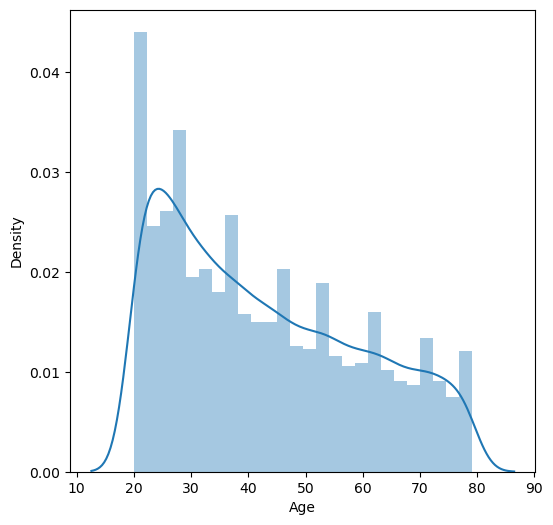

In [35]:

plt.figure(figsize=(6,6))
sns.distplot(data['Age'])
plt.show()

In [36]:
data['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [37]:
#Converting category labels into numerical
data['Gender'].replace({'male':0, 'female':1}, inplace=True)
data


,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,1,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,1,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,1,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,0,78,193.0,97.0,2.0,84.0,38.3


In [38]:
# separating the predictors and the target column
y=data['Calories']
X=data.drop(['Calories','User_ID'],axis=1)

In [39]:
# splitting the dataset using train_test_split 
# train:test = 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=45)

Bulid The Model

In [40]:
lm = LinearRegression()
model = lm.fit(X_train, Y_train)

In [41]:
# getting the predictions
y_pred = model.predict(X_test)
y_pred

array([ 75.93462844, 114.00047721, 125.58474794, ...,  26.55183653,
        95.8736903 ,  81.81638676])

In [42]:
mae = metrics.mean_absolute_error(Y_test, y_pred)
print(mae)

8.27238922791442


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print( mean_squared_error(Y_test, y_pred))

125.39047490160705


computing the accuracy of our model

In [44]:
#The difference between the predictions value and the real value
df = pd.DataFrame({"y_test" : Y_test, "y_pred" 
                : y_pred, "diff between y_pred and y_test" :abs(y_pred - Y_test)})
df

,y_test,y_pred,diff between y_pred and y_test
10024,45.0,75.934628,30.934628
33,107.0,114.000477,7.000477
11966,120.0,125.584748,5.584748
1892,99.0,107.794304,8.794304
3217,101.0,110.995175,9.995175
...,...,...,...
4892,85.0,90.057147,5.057147
954,70.0,84.029795,14.029795
6787,35.0,26.551837,8.448163
14975,90.0,95.873690,5.873690


In [46]:
r2_score(y_pred, Y_test)

0.966349236950046

In [47]:
#The Model Score
model.score(X_train, Y_train)


0.9671444356140685

In [48]:
import statsmodels.api as sm
stmodel=sm.OLS(y,X).fit()
stmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Calories   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.766e+05
Date:                Wed, 29 May 2024   Prob (F-statistic):                        0.00
Time:                        16:13:56   Log-Likelihood:                         -58495.
No. Observations:               15000   AIC:                                  1.170e+05
Df Residuals:                   14993   BIC:                                  1.171e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Gender         1.3015      0.328      3.971      0.000       0.659       1.944
Age            0.5193      0.006     85.443      0.000       0.507       0.531
Height         0.0458      0.025      1.818      0.069      -0.004       0.095
Weight         0.0988      0.028      3.584      0.000       0.045       0.153
Duration       5.6111      0.021    270.363      0.000       5.570       5.652
Heart_Rate     2.0906      0.019    108.077      0.000       2.053       2.128
Body_Temp     -5.8862      0.079    -74.165      0.000      -6.042      -5.731
==============================================================================
Omnibus:                     3261.619   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7710.669
Skew:                           1.219   Prob(JB):                         0.00
Kurtosis:                       5.529   Cond. No.                         745.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""